# Importiere Bibliotheken

In [39]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Lege die Trainigsdaten fest und lade sie herunter

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)

100%|███████████████████████████████████| 9912422/9912422 [00:00<00:00, 15999858.09it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████████████| 28881/28881 [00:00<00:00, 26693630.19it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████████| 1648877/1648877 [00:00<00:00, 12253311.24it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████████████████████████████████████| 4542/4542 [00:00<00:00, 5512305.78it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# Lege die Testdaten fest

In [3]:
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [4]:
print(train_data)
print(test_data)
print(train_data.data.size())
print(train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])


# Zeige einen Trainingsdatensatz an

In [26]:
print(train_data.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

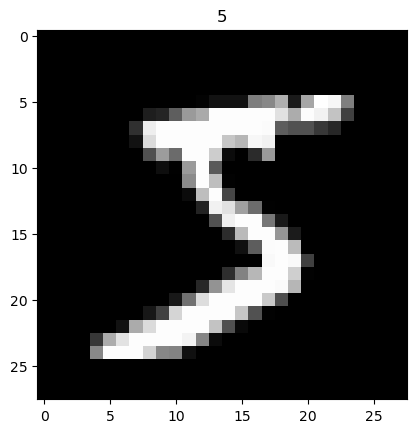

In [5]:
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

# Zeige mehrere Trainingsdaten an

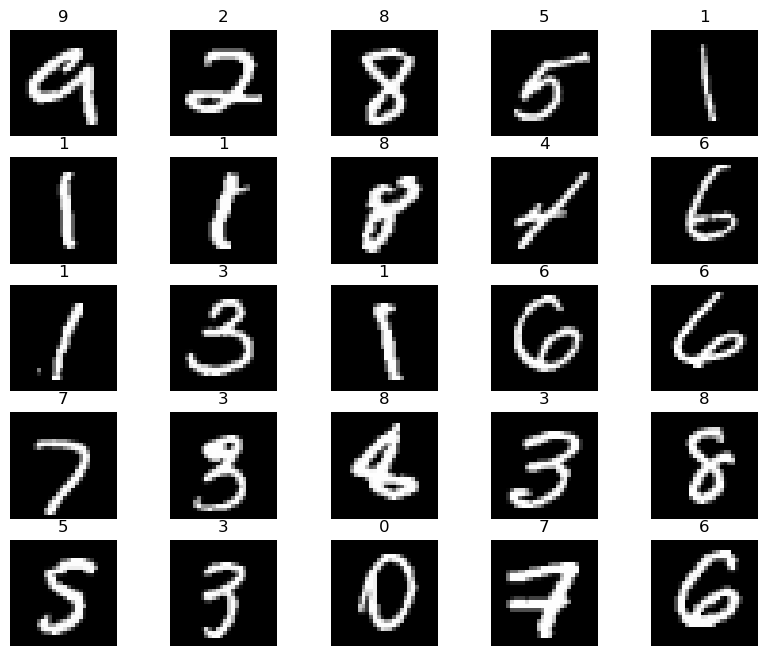

In [6]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Für das Training und Testen werden DatenLoader benötigt, 
die die Daten in kleinere Häppchen aufteilen und dem Overfitting mit einer Umstrukturierung (shuffle) der Daten entgegenwirken.

In [9]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x157742c10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1576a0610>}

In [10]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [11]:
cnn = CNN()
print(cnn)

loss_func = nn.CrossEntropyLoss()   
loss_func

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


CrossEntropyLoss()

# Definiere eine Optimierungsfunktion

In [12]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

# Setze die GPU als device, wenn möglich 

In [14]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

# Trainiere das Tiefe Neuronale Netz

In [15]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
  
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.0732
Epoch [1/10], Step [200/600], Loss: 0.0289
Epoch [1/10], Step [300/600], Loss: 0.0833
Epoch [1/10], Step [400/600], Loss: 0.0252
Epoch [1/10], Step [500/600], Loss: 0.0259
Epoch [1/10], Step [600/600], Loss: 0.0728
Epoch [2/10], Step [100/600], Loss: 0.0094
Epoch [2/10], Step [200/600], Loss: 0.0237
Epoch [2/10], Step [300/600], Loss: 0.0026
Epoch [2/10], Step [400/600], Loss: 0.0435
Epoch [2/10], Step [500/600], Loss: 0.0472
Epoch [2/10], Step [600/600], Loss: 0.0494
Epoch [3/10], Step [100/600], Loss: 0.0821
Epoch [3/10], Step [200/600], Loss: 0.0216
Epoch [3/10], Step [300/600], Loss: 0.0013
Epoch [3/10], Step [400/600], Loss: 0.0279
Epoch [3/10], Step [500/600], Loss: 0.0624
Epoch [3/10], Step [600/600], Loss: 0.0343
Epoch [4/10], Step [100/600], Loss: 0.0168
Epoch [4/10], Step [200/600], Loss: 0.0070
Epoch [4/10], Step [300/600], Loss: 0.0039
Epoch [4/10], Step [400/600], Loss: 0.0386
Epoch [4/10], Step [500/600], Loss: 0.0845
Epoch [4/10

# Evaluiere das Modell (TNN) mit dem Testdatensatz

In [16]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
test()

Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 0.95
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy 

# Zeige 10 Vorhersagen an

In [94]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

actual_number = lbls[:10].numpy()
actual_number

test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [8 8 9 0 3 5 5 2 3 9]
Actual number: [8 8 3 0 3 5 5 2 3 9]


# Praktische Aufgabe:
legen Sie eigene Ziffernbilder an und lassen Sie diese vom CNN prädizieren

## Zunächst Analyse der Daten, wie sie ins CNN hineingehen

In [93]:
imgs[:2].shape


torch.Size([2, 1, 28, 28])

In [92]:
print(imgs[:2])

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


## Tensor in numpy array wandeln, wenn man diesen über plot anzeigen möchte

In [58]:
Image = (255*imgs[5]).round()
Data = Image.numpy()
Data = Data[0,:,:]
Data = Data.astype(np.uint8)
Data.ndim

2

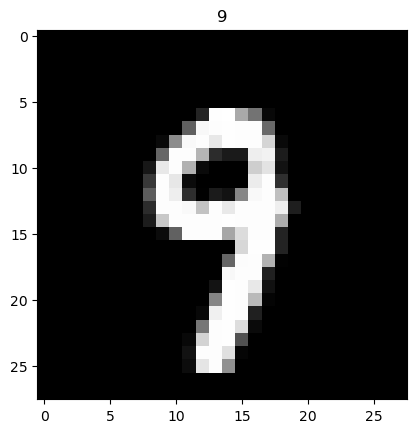

In [59]:
plt.imshow(Data, cmap='gray')
plt.title('%i' % pred_y[5])
plt.show()

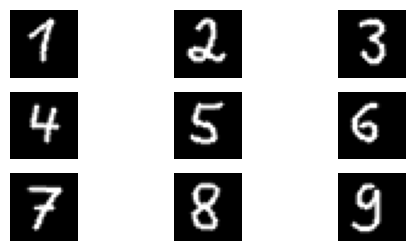

In [103]:
import imageio.v3 as iio
myDigits = np.zeros(9*28*28)
myDigits = myDigits.reshape(9,1,28,28);
myDigits[0,:,:,:] = iio.imread('data/1.png')
myDigits[0,:,:,:] = 255-myDigits[0,:,:,:]
myDigits[1,:,:,:] = iio.imread('data/2.png')
myDigits[1,:,:,:] = 255-myDigits[1,:,:,:]
myDigits[2,:,:,:] = iio.imread('data/3.png')
myDigits[2,:,:,:] = 255-myDigits[2,:,:,:]
myDigits[3,:,:,:] = iio.imread('data/4.png')
myDigits[3,:,:,:] = 255-myDigits[3,:,:,:]
myDigits[4,:,:,:] = iio.imread('data/5.png')
myDigits[4,:,:,:] = 255-myDigits[4,:,:,:]
myDigits[5,:,:,:] = iio.imread('data/6.png')
myDigits[5,:,:,:] = 255-myDigits[5,:,:,:]
myDigits[6,:,:,:] = iio.imread('data/7.png')
myDigits[6,:,:,:] = 255-myDigits[6,:,:,:]
myDigits[7,:,:,:] = iio.imread('data/8.png')
myDigits[7,:,:,:] = 255-myDigits[7,:,:,:]
myDigits[8,:,:,:] = iio.imread('data/9.png')
myDigits[8,:,:,:] = 255-myDigits[8,:,:,:]

figure = plt.figure(figsize=(6, 3))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    #plt.title(label)
    plt.axis("off")
    plt.imshow(myDigits[i-1,0,:,:], cmap="gray")
plt.show()

In [105]:
imgTensor = torch.tensor(myDigits/255, dtype=torch.float32)
imgTensor = torch.reshape(imgTensor, (9,1,28,28))
#print(imgTensor)
imgTensor.shape

torch.Size([9, 1, 28, 28])

In [106]:
test_output, last_layer = cnn(imgTensor)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y)

[1 2 3 4 5 6 7 8 9]


# Anzahl der Parameter des CNNs bestimmen

In [107]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(cnn)

28938

In [110]:
print(cnn.conv1[0].weight)
cnn.conv1[0].weight.shape

Parameter containing:
tensor([[[[-0.6480, -0.5514, -0.0499,  0.0027,  0.2588],
          [-0.2974,  0.1010,  0.2995,  0.5962,  0.7392],
          [ 0.2220,  0.4319,  0.2367, -0.1430,  0.3054],
          [-0.1486,  0.1449, -0.0554, -1.4759, -0.2060],
          [-0.0034, -0.6262, -1.1569,  0.0090,  0.6435]]],


        [[[-0.3211, -0.3809, -0.0845,  0.1560, -0.2674],
          [-0.6605, -0.5621,  0.2483, -0.0652, -0.3578],
          [-0.6527,  0.1441,  0.1651, -0.4712, -0.6648],
          [-0.3262,  0.1234, -0.3791, -0.3965, -0.1675],
          [-0.1750, -0.1935, -0.3136, -0.0679, -0.3808]]],


        [[[ 0.1886, -0.0993, -1.2470, -0.3866, -0.0401],
          [-0.1773, -1.2903, -0.2162, -0.1386,  0.1421],
          [-0.3799, -0.9938, -0.8032,  0.2096,  0.1961],
          [-0.2002, -0.7788, -0.9898,  0.1226,  0.3529],
          [-0.6315, -0.7092, -0.1479,  0.5538,  0.2282]]],


        [[[ 0.0079,  0.0499,  0.2150,  0.0363,  0.1298],
          [-0.9507, -1.1327, -1.1464, -1.1776, -0.3534

torch.Size([16, 1, 5, 5])

# Ein paar gelerne Kernel-Matrizen der 1. Stufe anzeigen 

In [111]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape

    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

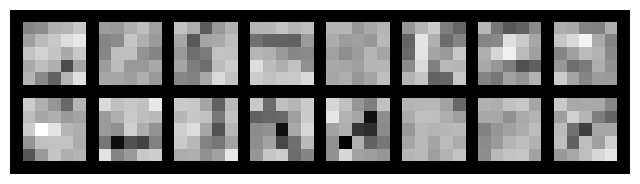

In [118]:
from torchvision import utils

if __name__ == "__main__":
    layer = 1
    filter = cnn.conv1[0].weight.data.clone()
    visTensor(filter, ch=0, allkernels=False)

    plt.axis('off')
    plt.ioff()
    plt.show()

# Ein paar gelerne Kernel-Matrizen der 2. Stufe anzeigen 

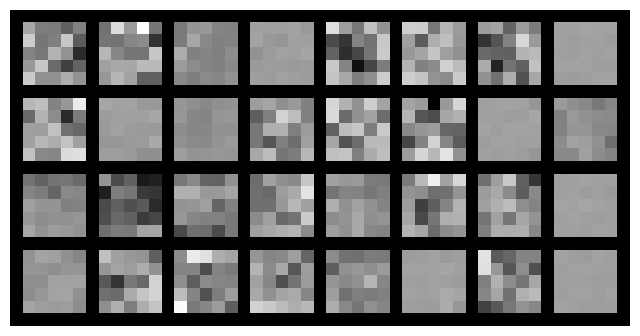

In [116]:
filter = cnn.conv2[0].weight.data.clone()
visTensor(filter, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

In [123]:
for p in cnn.parameters():
    print(p.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


# Erklärung der Parameter:

 * #Kernel mal Größe in der 1. Convolution Schicht = 16 * 5x5  =  400 Parameter   
 * $W_i \cdot I+b_i$   ($b_i =$ Bias) für $i=1..16$   =  16 Parameter   
 * #Kernel in der 2. Convol.Schicht mal Größe mal #Faltungsergebnisse aus 1. Schicht = 32 * 16 * 5x5 = 12.800 Parameter   
 * $W_i \cdot I+b_i$   ($b_i =$ Bias) für $i=1..32$   =  32 Parameter   
 * Fully connected layer 1568 Neuronen müssen jeweils mit 10 Neuronen verbunden werden = 10 * 1568 = 15.680 Parameter   
 *  Je Output-Neuron ein Bias-Wert = 10  Parameter
______________________________
     Summe              28.938 Parameter